In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge,RidgeCV#线性回归模型的岭回归
from datetime import datetime
# from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier     #随机森林用于分类
from sklearn.ensemble import RandomForestRegressor as RFR      #随机森林用于回归
from sklearn.model_selection import train_test_split           #划分训练集与测试集
from sklearn import metrics    
from sklearn.metrics import r2_score              #用于模型拟合优度评估
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
pd.options.display.max_rows = None
import xgboost as xgb
 


In [3]:
data = pd.read_excel('Data/Cp-Mordred+Rdkit_only-GBRT-6-fearures.xlsx',index_col=0)
random_data = shuffle(data)
data

,NAME,Cp,Temperature,ATS0s,ATS0pe,ATSC0m,NumValenceElectrons,Kappa2
0,56-23-5,131.300,298.150,8.805908,46.4449,439.509377,32,1.741848
1,56-23-5,133.100,301.200,8.805908,46.4449,439.509377,32,1.741848
2,56-23-5,130.500,303.300,8.805908,46.4449,439.509377,32,1.741848
3,56-23-5,131.500,293.000,8.805908,46.4449,439.509377,32,1.741848
4,56-81-5,218.900,298.150,122.277778,93.7283,603.017390,38,3.084918
5,56-81-5,229.300,313.150,122.277778,93.7283,603.017390,38,3.084918
6,56-81-5,221.700,301.200,122.277778,93.7283,603.017390,38,3.084918
7,56-81-5,223.400,299.400,122.277778,93.7283,603.017390,38,3.084918
8,56-81-5,225.900,289.700,122.277778,93.7283,603.017390,38,3.084918
9,56-81-5,221.180,293.150,122.277778,93.7283,603.017390,38,3.084918


In [4]:
Model_series=Series()
Table_series = Series()
Log_df = pd.DataFrame(columns=['Train_r2','Test_r2','Train_RMSE','Train_MAE','Test_RMSE','Test_MAE'])

In [5]:
#定义保存拟合结果的Table
def Create_Table(X_train_1,X_test_1,predictions,train_predictions):

    X_train_1.insert(loc=2,column='Predict',value=train_predictions)
    X_test_1.insert(loc=2,column='Predict',value=predictions)
    
    part_row = pd.DataFrame([[np.NaN]*len(X_train_1.columns)],columns = X_train_1.columns)
    
    X_train_1 = X_train_1.append(part_row)
    X_train_1 = X_train_1.append(X_test_1)
    
    return X_train_1

In [6]:
i=1
#lines = Feature_name9
# random_data = shuffle(data)
while(1):
    print("开始第"+str(i)+"次运行********************************")
    random_data = shuffle(random_data)

    X = random_data #特征
    y = random_data.loc[:,'Cp'] #预测值 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    X_train_1 = X_train.copy()
    X_test_1 = X_test.copy()
    
    X_train = X_train.iloc[:,2:]
    X_test = X_test.iloc[:,2:]
    
    # 数据标准化处理
    stand_scaler = StandardScaler()
    X_train = stand_scaler.fit_transform(X_train)
    X_test = stand_scaler.transform(X_test) 


    # GBRT训练过程
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    train_pre = model.predict(X_train)
    test_pre = model.predict(X_test)
   # predict_pre = model.predict(X_predict)


    train_score = np.round(r2_score(y_train,train_pre),3)
    test_score = np.round(r2_score(y_test,test_pre),3)
#    predict_score = np.round(r2_score(y_predict,predict_pre),3)

    print("train_score:",train_score)
    print("test_score:",test_score)
#    print("predict_score:",predict_score)
    print("开始优化:")
    Optimization_start = datetime.now()

    param_grid ={
        "n_estimators": range(80,300,10),
         "min_samples_leaf": [1,5,10,15,27,30,35],
        "learning_rate": [0.001,0.005,0.01,0.015, 0.02,0.03,0.1,0.3,0.5,0.7],
        "max_depth":[2, 3, 4, 5,8,10],
        "min_samples_split": [2, 4,6,8.10],
        'max_features':['auto','sqrt','log2'],
    }
    
    optimizestarttime = datetime.now()
    print("开始第"+str(i)+"次对GBRT优化")

    rnd_search = RandomizedSearchCV(model, param_distributions=param_grid,
                            n_iter=300, cv=10, scoring='r2',n_jobs=10)
    rnd_search.fit(X_train, y_train)

    finishtime = datetime.now()
    print("完成第"+str(i)+"次对GBRT优化"+'Running time: %s Seconds'%(finishtime-optimizestarttime))
    
    best_model = rnd_search.best_estimator_
    best_model.fit(X_train,y_train)
    predictions= best_model.predict(X_test)                 #预测
    train_predictions = best_model.predict(X_train)
    bestmodel_r2_train = r2_score(y_train,best_model.predict(X_train))
    bestmodel_r2_test = r2_score(y_test,predictions)
#     bestmodel_r2_predic = r2_score(y_predict,best_model.predict(X_predict))

    standard_value = round((bestmodel_r2_test + bestmodel_r2_train)/2,3)
    


    print("调优后训练集：",round(bestmodel_r2_train,3))  
    print("调优后测试集：",round(bestmodel_r2_test,3))    
#     print("调优后验证集：",round(bestmodel_r2_predic,3))
    
    Train_RMSE = np.round(np.sqrt(mean_squared_error(y_train,best_model.predict(X_train))),3)
    Train_MAE = np.round(mean_absolute_error(y_train,best_model.predict(X_train)),3)
    Test_RMSE = np.round(np.sqrt(mean_squared_error(y_test,predictions)),3)
    Test_MAE = np.round(mean_absolute_error(y_test,predictions),3)

    if(bestmodel_r2_test>0.8 and bestmodel_r2_train > 0.8):
        Table = Create_Table(X_train_1,X_test_1,predictions,train_predictions)

        if len(Log_df)<10:
            Model_series[standard_value] = best_model
            Log_df.loc[standard_value] = [bestmodel_r2_train,bestmodel_r2_test,Train_RMSE,Train_MAE,Test_RMSE,Test_MAE]
            Table_series[standard_value] = Table
            Log_df = Log_df.sort_index(ascending=False)
        elif (standard_value > min(Model_series.index)):
            sorted_value = sorted(Model_series.index)
            for j in range(len(Model_series.index)):
                if standard_value == sorted_value[j]:
                    if Log_df[Log_df.index == sorted_value[j]]['Test_r2']  <  bestmodel_r2_test:
                        break
                if standard_value > sorted_value[j]:
                    break
            del Model_series[sorted_value[j]]
            del Table_series[sorted_value[j]]
            
            Log_df.drop(sorted_value[j],inplace=True)
            Model_series[standard_value] = best_model
            Table_series[standard_value] = Table
            Log_df.loc[standard_value] = [bestmodel_r2_train,bestmodel_r2_test,Train_RMSE,Train_MAE,Test_RMSE,Test_MAE]
            Log_df = Log_df.sort_index(ascending=False)
    if(i%50 == 0):
        print("已保存"+str(len(Log_df))+"个优秀模型*****")    
        if(len(Log_df)>0):
            print(Log_df)     
    i+=1
    

开始第1次运行********************************
train_score: 0.955
test_score: 0.915
开始优化:
开始第1次对GBRT优化


KeyboardInterrupt: 

In [36]:
Table_series[a].to_excel('Out_data/Cp-GBRT-'+str(a)+'.xlsx')

In [35]:
joblib.dump(Model_series[a],'Model/Cp-GBRT-'+str(a)+'.pkl')

['Model/Cp-GBRT-0.969.pkl']

In [58]:
cv_results


array([0.97935005, 0.96158243, 0.96434128, 0.92517963, 0.93917279,
       0.96290917, 0.94114353, 0.9782813 , 0.9404209 , 0.97728523])

In [69]:
X_train_shap = pd.DataFrame(X_train)
X_train_shap.columns = Teable0985_train.columns[3:]
X_train_shap

,Temperature,TI1_L,Eig06_AEA(ri),H_RG
0,-0.041119,0.189291,-0.225050,-0.131959
1,-0.041119,0.232359,1.116142,-0.128438
2,-0.041119,0.091968,-0.225050,-0.130160
3,-0.041119,0.232359,-0.225050,-0.126841
4,-0.068764,-0.086601,-0.117529,-0.121753
5,0.152391,0.232359,-0.538561,-0.126070
6,-1.238329,0.155974,-0.225050,-0.129473
7,-0.041119,0.232359,-0.225050,-0.130907
8,0.505387,0.652859,1.919725,-0.074508
9,0.037561,0.189291,-0.225050,-0.132020


In [11]:
model = joblib.load("Model/Cp-GBRT-0.969.pkl")

In [12]:
model

GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_split=6,
                          n_estimators=230)

In [22]:
# shap模型解释
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码

explainer = shap.TreeExplainer(Model_series[a])
shap_values = explainer.shap_values(X_train_std)  # 传入特征矩阵X，计算SHAP值


In [27]:
shap_values

array([[ 21.44224804,  11.86007529,  -4.73876585,  -8.55303743,
         -8.29368535,  -7.51638562],
       [  1.93300177,   3.43807562, -47.07146279, -16.77006354,
        -30.04068873, -16.75088654],
       [  0.81202628, -15.25773629, -12.30474754, -10.58292462,
        -16.87010962,  -7.71940438],
       ...,
       [  2.36871765,  12.47495118, -10.43724889,   1.6791027 ,
         -8.18557026,  -3.40369874],
       [  2.01815774,   6.61740873,   7.52104337,   5.28059562,
          1.30070897, -10.51901614],
       [ -5.15041483, -11.46867111, -29.09933677, -11.73566931,
         -8.41315143, -12.78403258]])

In [31]:
# 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_std.iloc[0,:])

In [29]:
X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = X_train.columns

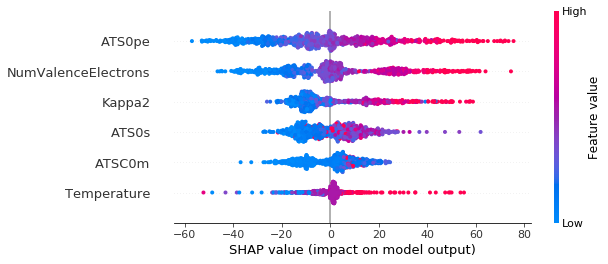

In [30]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train_std)

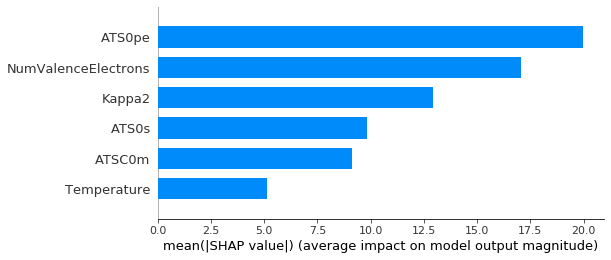

In [32]:
shap.summary_plot(shap_values, X_train_std, plot_type="bar")


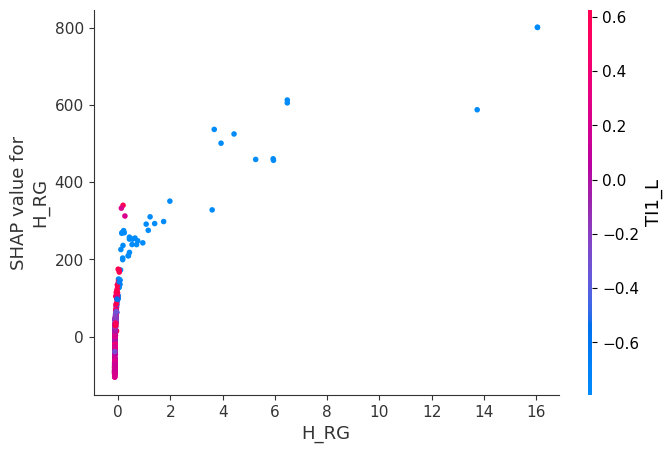

In [75]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("H_RG", shap_values, X_train_shap)